## GMAIL SPAM DETECTION

In [85]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
data = pd.read_csv("SPAM-210331-134237.csv")
data.head()

,type,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [87]:
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
data

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [88]:
data.shape

(5572, 2)

In [89]:
data.columns

Index(['type', 'text'], dtype='object')

In [90]:
data.drop_duplicates(inplace=True)
print(data.shape)

(5169, 2)


In [91]:
print(data.isnull().sum())

type    0
text    0
dtype: int64


In [92]:
#for counting ham and spam

data.type.value_counts()

ham     4516
spam     653
Name: type, dtype: int64

In [93]:
data.groupby('type').describe()

text                                                               
     count unique                                                top freq
type                                                                     
ham   4516   4516                   How long does it take to get it.    1
spam   653    653  Get 3 Lions England tone, reply lionm 4 mono o...    1

### Visualizations

Text(0.5, 1.0, 'Distribution of Spam and Ham')

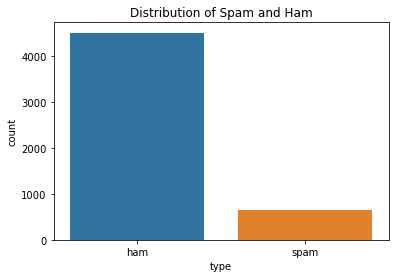

In [94]:
#plotting graph for distribution

sns.countplot(x = "type", data = data)
data.loc[:, 'type'].value_counts()
plt.title('Distribution of Spam and Ham')

C:\Users\anush\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anush\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


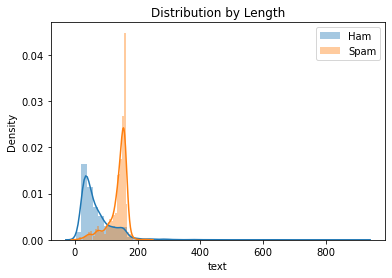

In [95]:
# plotting graph by length.

ham =data[data['type'] == 'ham']['text'].str.len()
sns.distplot(ham, label='Ham')
spam = data[data['type'] == 'spam']['text'].str.len()
sns.distplot(spam, label='Spam')
plt.title('Distribution by Length')
plt.legend()

C:\Users\anush\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anush\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


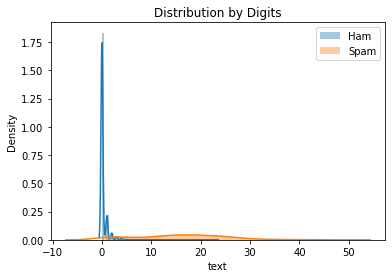

In [96]:
#plotting graph by digits.

ham1 = data[data['type'] == 'ham']['text'].str.replace(r'\D+', '').str.len()
sns.distplot(ham1, label='Ham')
spam1 = data[data['type'] == 'spam']['text'].str.replace(r'\D+', '').str.len()
sns.distplot(spam1, label='Spam')
plt.title('Distribution by Digits')
plt.legend()

C:\Users\anush\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anush\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


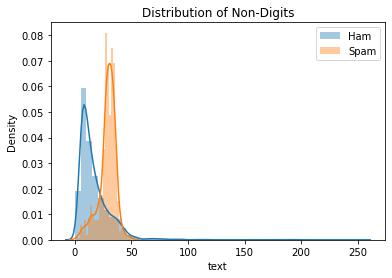

In [97]:
#plotting graph for non-digits.

ham2 = data[data['type'] == 'ham']['text'].str.replace(r'\w+', '').str.len()
sns.distplot(ham2, label='Ham')
spam2 = data[data['type'] == 'spam']['text'].str.replace(r'\w+', '').str.len()
sns.distplot(spam2, label='Spam')
plt.title('Distribution of Non-Digits')
plt.legend()

In [98]:
#for counting frequently occurence of spam and ham.
from collections import Counter

count1 = Counter(" ".join(data[data['type']=='ham']["text"]).split()).most_common(30)
data1 = pd.DataFrame.from_dict(count1)
data1 = data1.rename(columns={0: "words of ham", 1 : "count"})
count2 = Counter(" ".join(data[data['type']=='spam']["text"]).split()).most_common(30)
data2 = pd.DataFrame.from_dict(count2)
data2 = data2.rename(columns={0: "words of spam", 1 : "count_"})

### Graph for top 30 words of ham

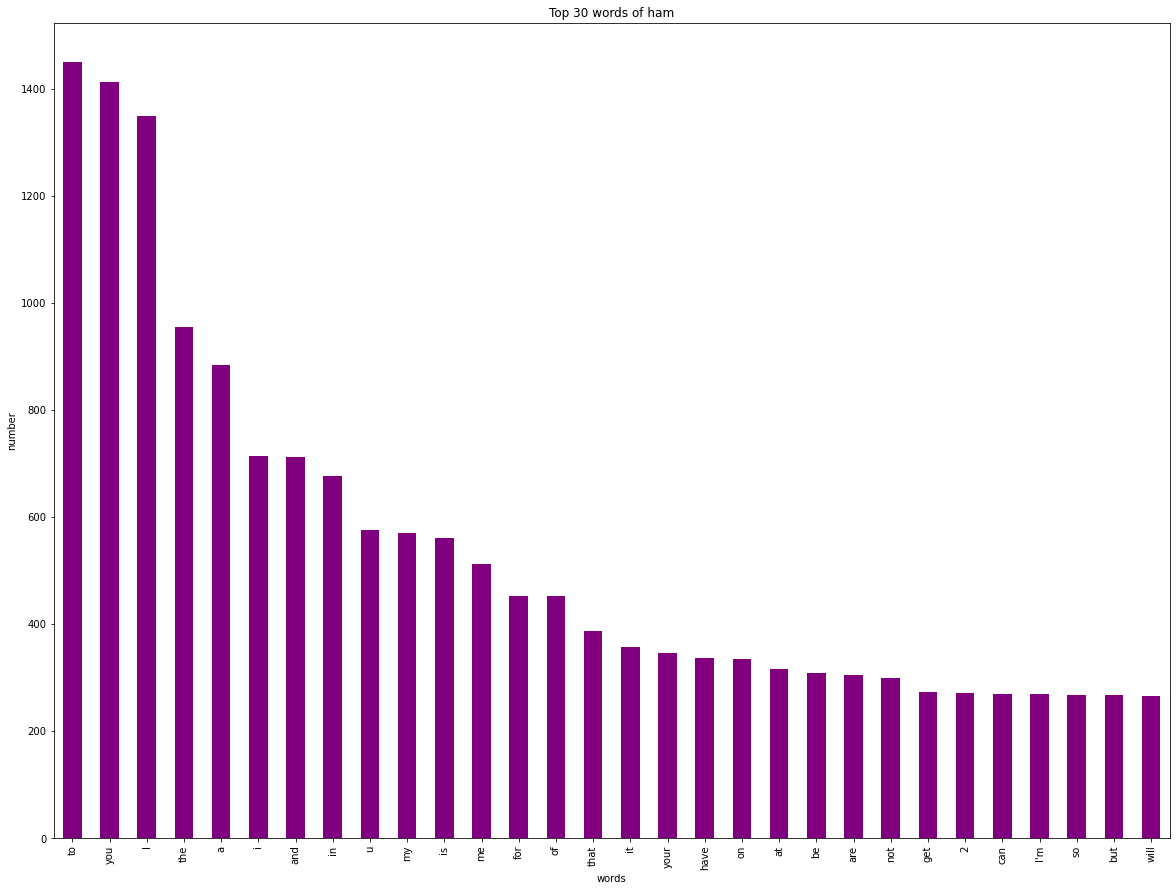

In [99]:
data1.plot.bar(legend = False, color = 'purple',figsize = (20,15))
y_pos = np.arange(len(data1["words of ham"]))
plt.xticks(y_pos, data1["words of ham"])
plt.title('Top 30 words of ham')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

### Graph for top 30 words of spam

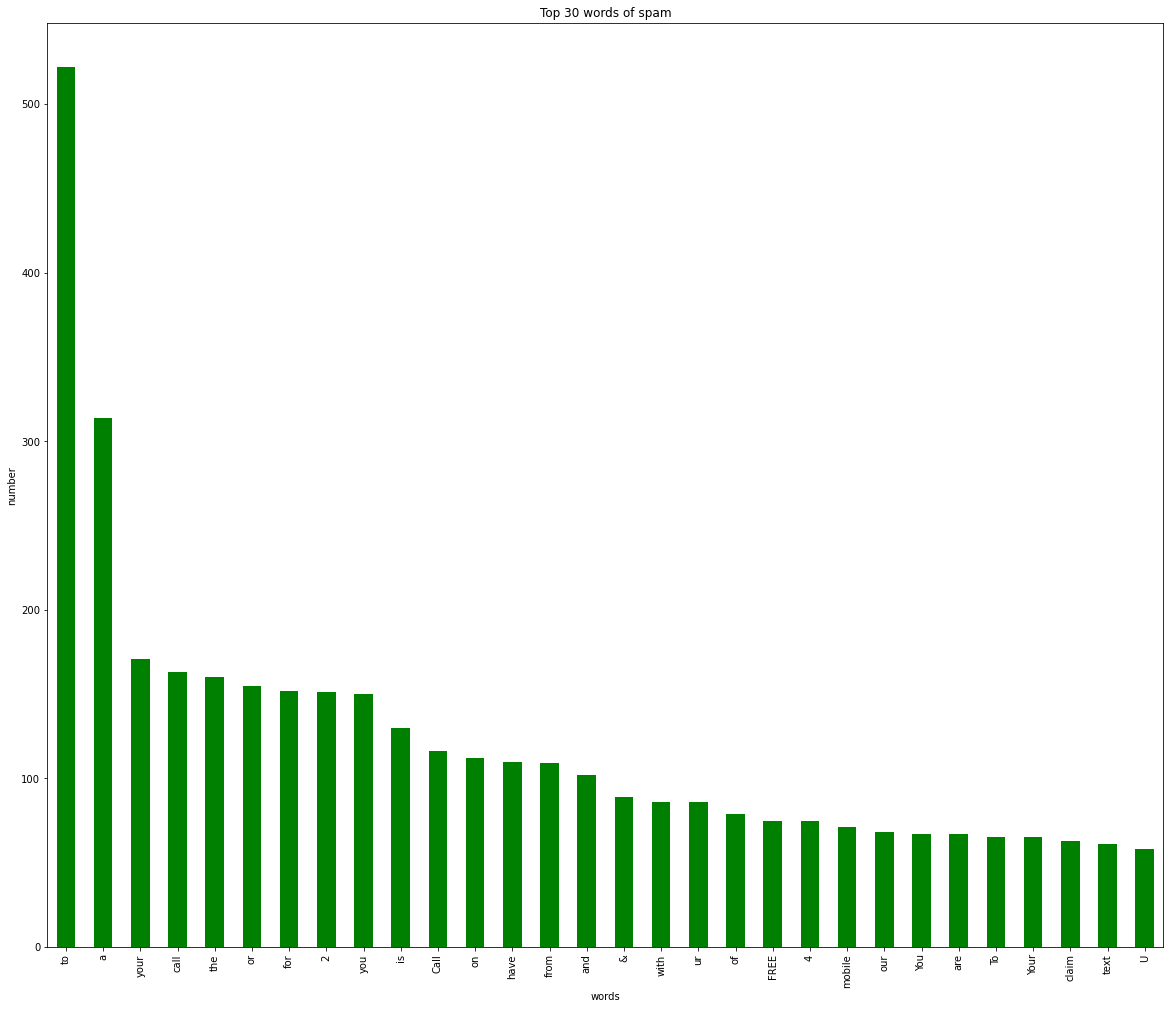

In [100]:
data2.plot.bar(legend = False, color = 'green', figsize = (20,17))
y_pos = np.arange(len(data2["words of spam"]))
plt.xticks(y_pos, data2["words of spam"])
plt.title('Top 30 words of spam')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

### splitting the data into traing and test set

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['type'], test_size = 0.3, random_state = 37)
print ("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

X_train:  3618
X_test:  1551
y_train:  3618
y_test:  1551


In [103]:
cv = CountVectorizer(max_features = 1500)
cv.fit(X_train)

CountVectorizer(max_features=1500)

In [104]:
X_train_cv = cv.transform(X_train)
X_train_cv

<3618x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 39843 stored elements in Compressed Sparse Row format>

In [105]:
X_test_cv = cv.transform(X_test)
X_test_cv

<1551x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 16707 stored elements in Compressed Sparse Row format>

## Naive bayes classification

In [106]:
mnb = MultinomialNB(alpha = 0.5)
mnb.fit(X_train_cv,y_train)

y_mnb = mnb.predict(X_test_cv)

In [107]:
print('Naive Bayes Accuracy: ', accuracy_score( y_mnb , y_test))
print('Naive Bayes confusion_matrix: ', confusion_matrix(y_mnb, y_test))

Naive Bayes Accuracy:  0.9851708575112831
Naive Bayes confusion_matrix:  [[1344   15]
 [   8  184]]


## SVM Classification

In [108]:
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train_cv,y_train)
y_svc = svc.predict(X_test_cv)

In [109]:
print('SVM Accuracy: ', accuracy_score( y_svc , y_test))
print('SVM confusion_matrix: ', confusion_matrix(y_svc, y_test))

SVM Accuracy:  0.8362346872985171
SVM confusion_matrix:  [[1234  136]
 [ 118   63]]


## KNeighbors Classification

In [110]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=100)
knc.fit(X_train_cv,y_train)

y_knc = knc.predict(X_test_cv)

In [111]:
print('KNeighbors Accuracy_score: ',accuracy_score(y_test,y_knc))
print('KNeighbors confusion_matrix: ', confusion_matrix(y_test, y_knc))

KNeighbors Accuracy_score:  0.8716956802063185
KNeighbors confusion_matrix:  [[1352    0]
 [ 199    0]]


## Decision tree Classification

In [112]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=252)
dtc.fit(X_train_cv,y_train)
y_dtc = dtc.predict(X_test_cv)

In [113]:
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=252)
dtc.fit(X_train_cv,y_train)
y_dtc = dtc.predict(X_test_cv)

In [114]:
print('Decision Tree Accuracy: ',accuracy_score(y_test,y_dtc))
print('Decision Tree confusion_matrix: ', confusion_matrix(y_dtc, y_test)) 

Decision Tree Accuracy:  0.9658284977433914
Decision Tree confusion_matrix:  [[1331   32]
 [  21  167]]


## Random Forest Classification

In [115]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=37, random_state=252)
rfc.fit(X_train_cv,y_train)
y_rfc = rfc.predict(X_test_cv)

In [116]:
print('Random Forest Accuracy_score: ',accuracy_score(y_test,y_rfc))
print('Random Forest confusion_matrix: ', confusion_matrix(y_rfc, y_test))

Random Forest Accuracy_score:  0.9761444229529336
Random Forest confusion_matrix:  [[1351   36]
 [   1  163]]


## Accuracy of all the models

In [117]:
results = pd.DataFrame({
    'Model': ['Naive Bayes','SVM', 'KNN','Decision Tree','Random Forest'],
    'Score': [0.98,0.83,0.87,0.96,0.97]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
print(result_df)

               Model
Score               
0.98     Naive Bayes
0.97   Random Forest
0.96   Decision Tree
0.87             KNN
0.83             SVM


In [118]:
print("Naive bayes Classification has the highest accuracy")

Naive bayes Classification has the highest accuracy
